## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

[*********************100%***********************]  1 of 1 completed


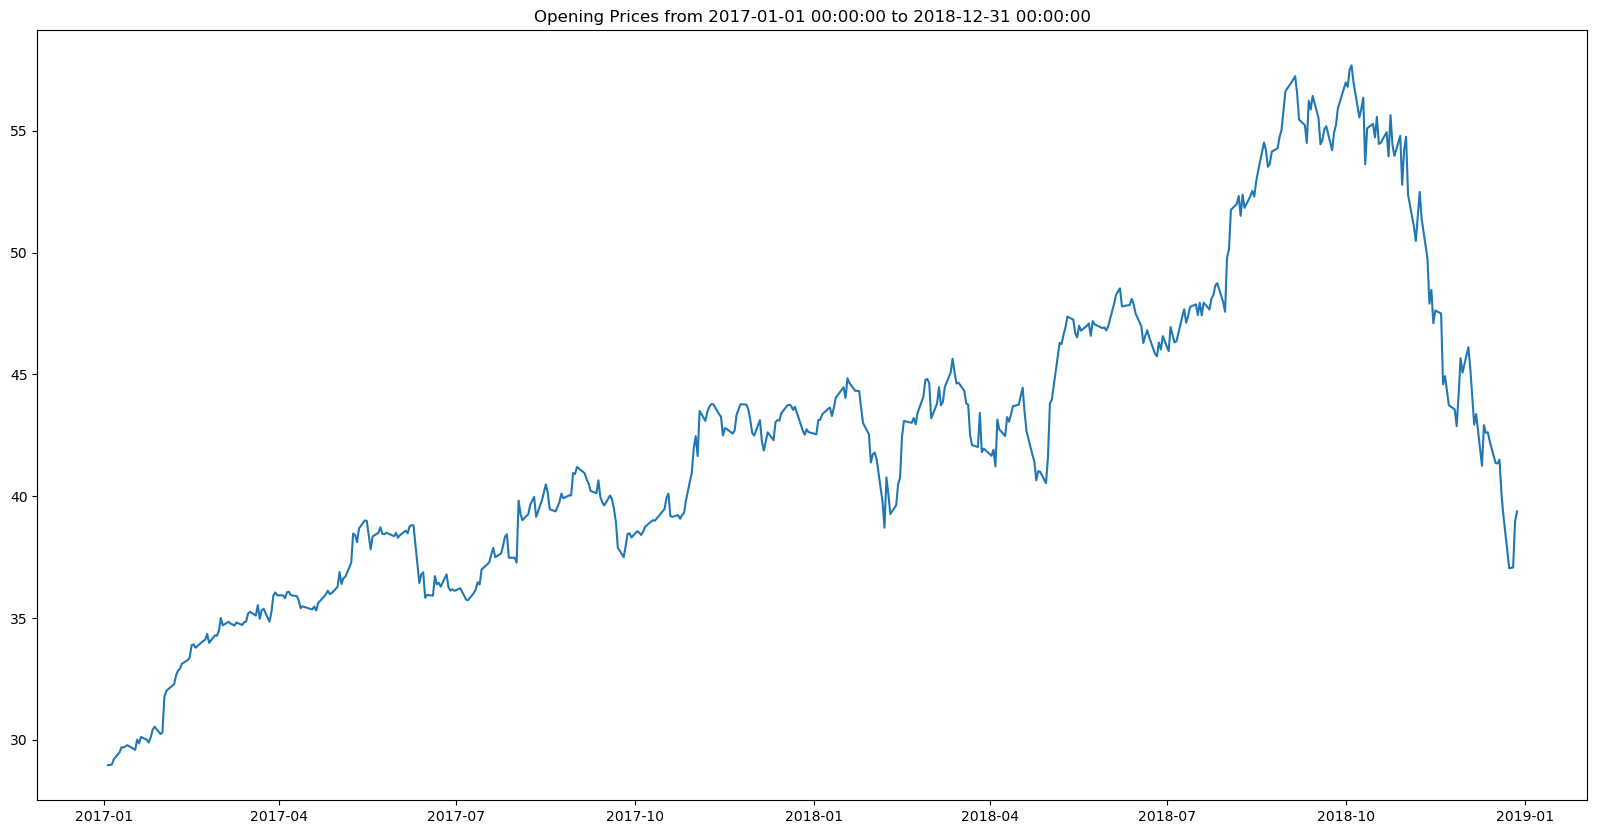

In [45]:
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
  

start_date = datetime(2017, 1, 1)
end_date = datetime(2018, 12, 31)
  

data = yf.download('AAPL', start = start_date,
                   end = end_date)
  
# display
plt.figure(figsize = (20,10))
plt.title('Opening Prices from {} to {}'.format(start_date,
                                                end_date))
plt.plot(data['Open'])
# plt.scatter(data["High"],data["Volume"])
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [46]:
df = pd.DataFrame(data)
ndf = df[["High"]].to_numpy()
data_mean, data_std = mean(ndf), std(ndf)
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
outliers = [x for x in ndf if x < lower or x > upper]
print('Выбросы: %d' % len(outliers))
# outliers_removed = [x for x in ndf if x >= lower and x <= upper]
# print('Без выбросов: %d' % len(outliers_removed))


Выбросы: 0


## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

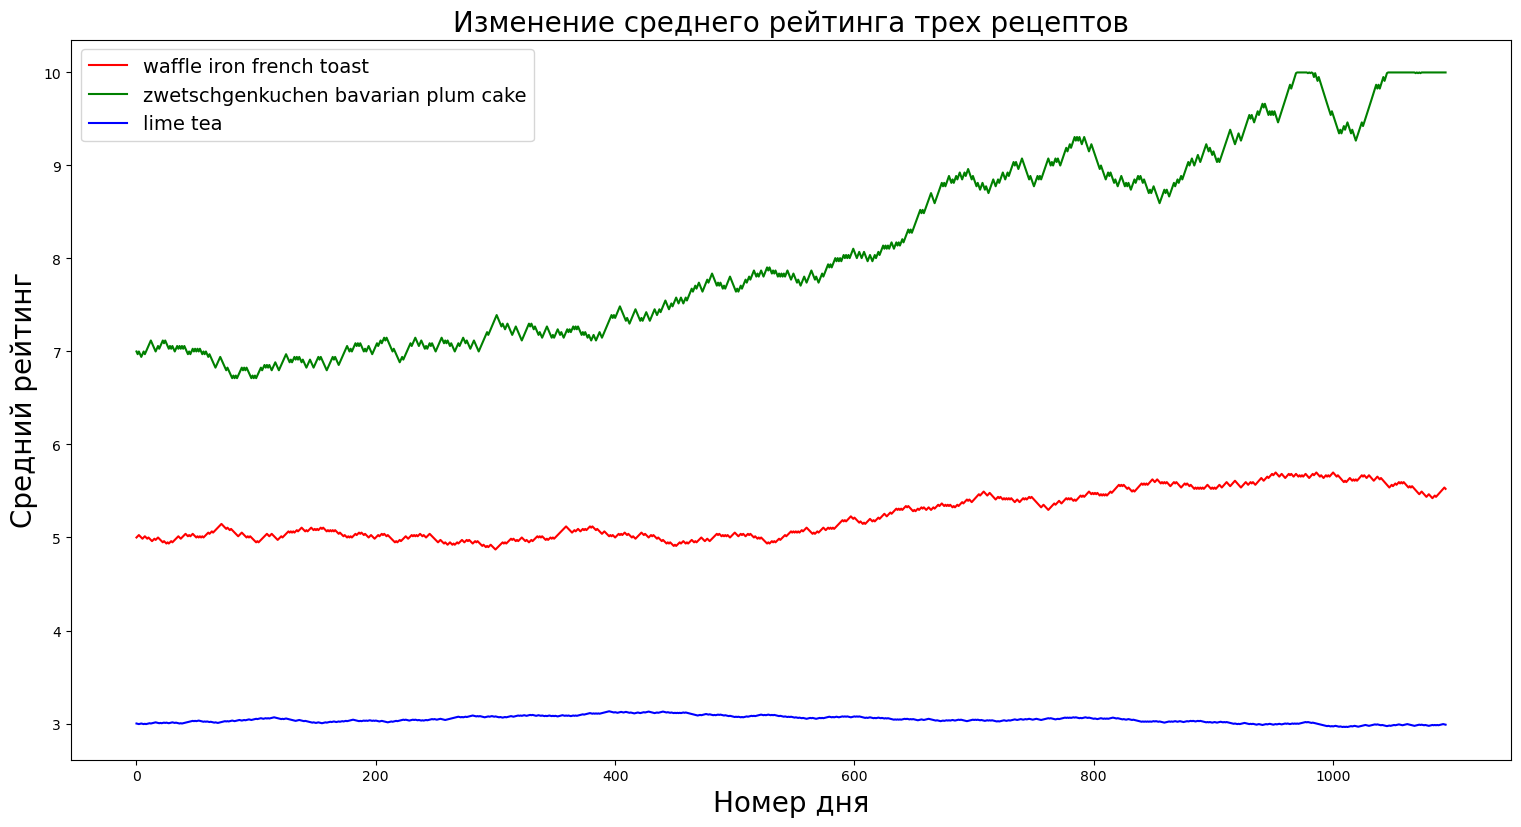

In [65]:
data = np.load('data/average_ratings.npy')

legend = {
    0: "waffle iron french toast",
    1: "zwetschgenkuchen bavarian plum cake",
    2: "lime tea"
}

# Основной график
fig = plt.figure(figsize = (24, 12))
ax = fig.add_axes([0.2, 0.2, 0.6, 0.6])
plt.plot(data[0], color='r', label=legend[0])
plt.plot(data[1], color='g', label=legend[1])
plt.plot(data[2], color='b', label=legend[2])
plt.xlabel("Номер дня", fontsize=20)
plt.ylabel("Средний рейтинг", fontsize=20)
plt.title('Изменение среднего рейтинга трех рецептов', fontsize=20) 

# Легенда
plt.legend(loc=0,fontsize=14)

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


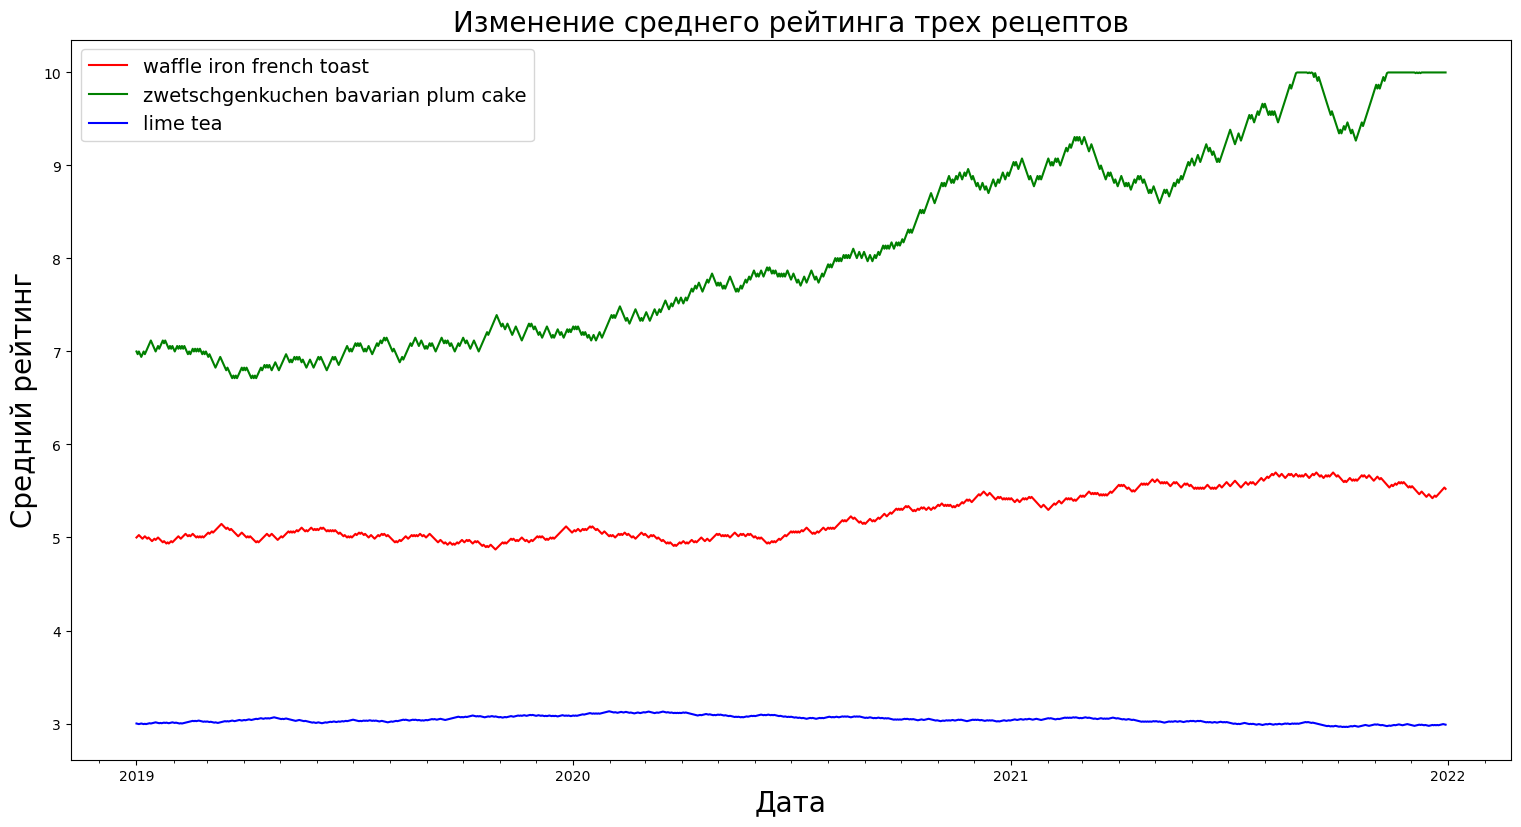

In [63]:
dates = pd.date_range(start='1/1/2019', end='30/12/2021')

fig = plt.figure(figsize = (24, 12))
ax = fig.add_axes([0.2, 0.2, 0.6, 0.6])

line1, = ax.plot(dates, data[0], 'r', label = legend[0])
line2, = ax.plot(dates, data[1], 'g', label = legend[1])
line3, = ax.plot(dates, data[2], 'b', label = legend[2])
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_xlabel('Дата', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)

plt.legend(loc=0,fontsize=14)

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

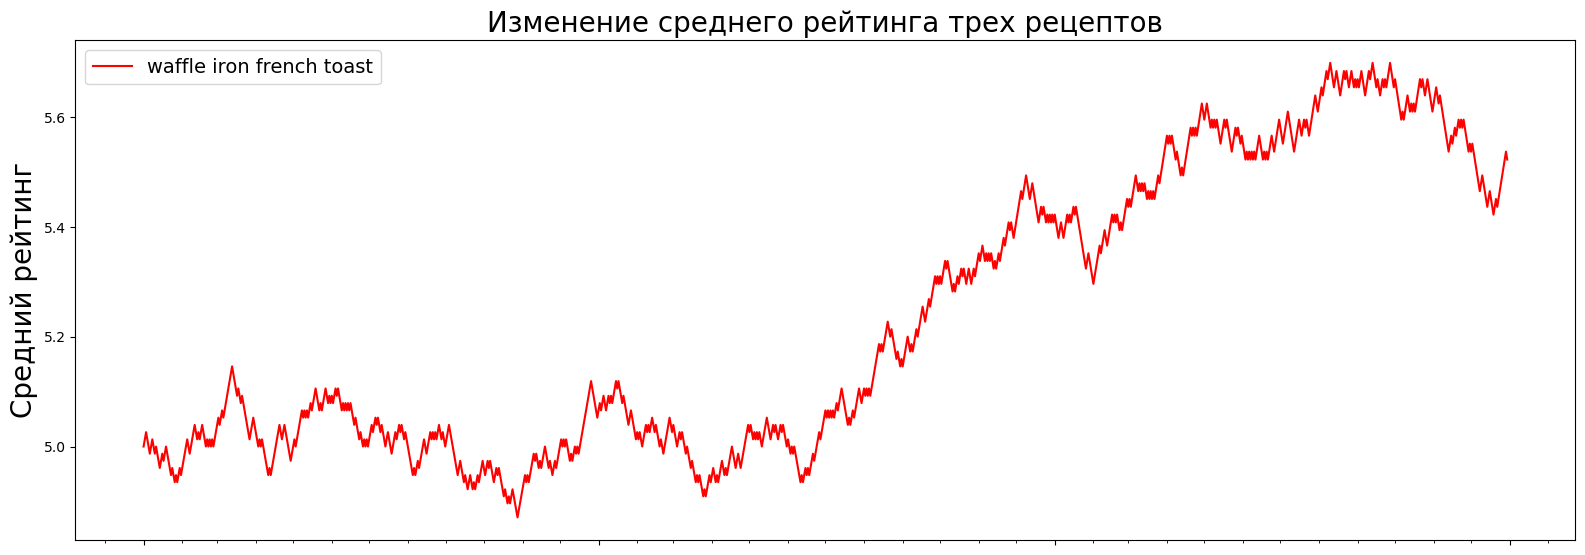

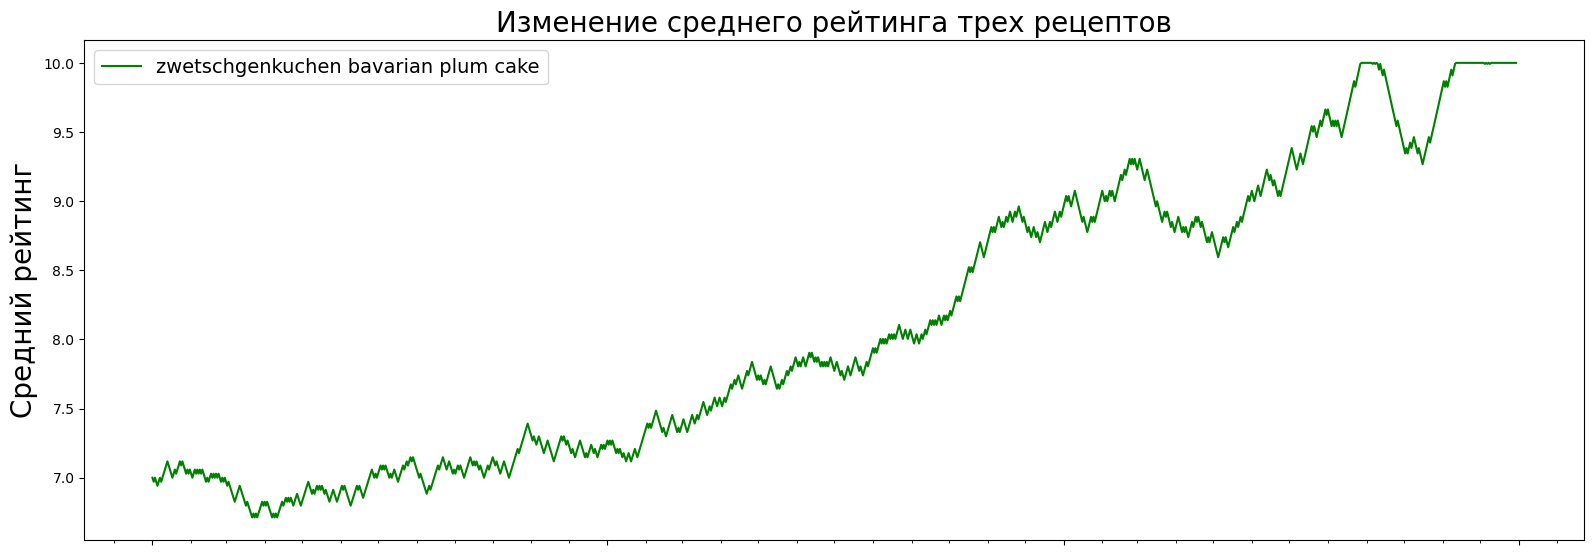

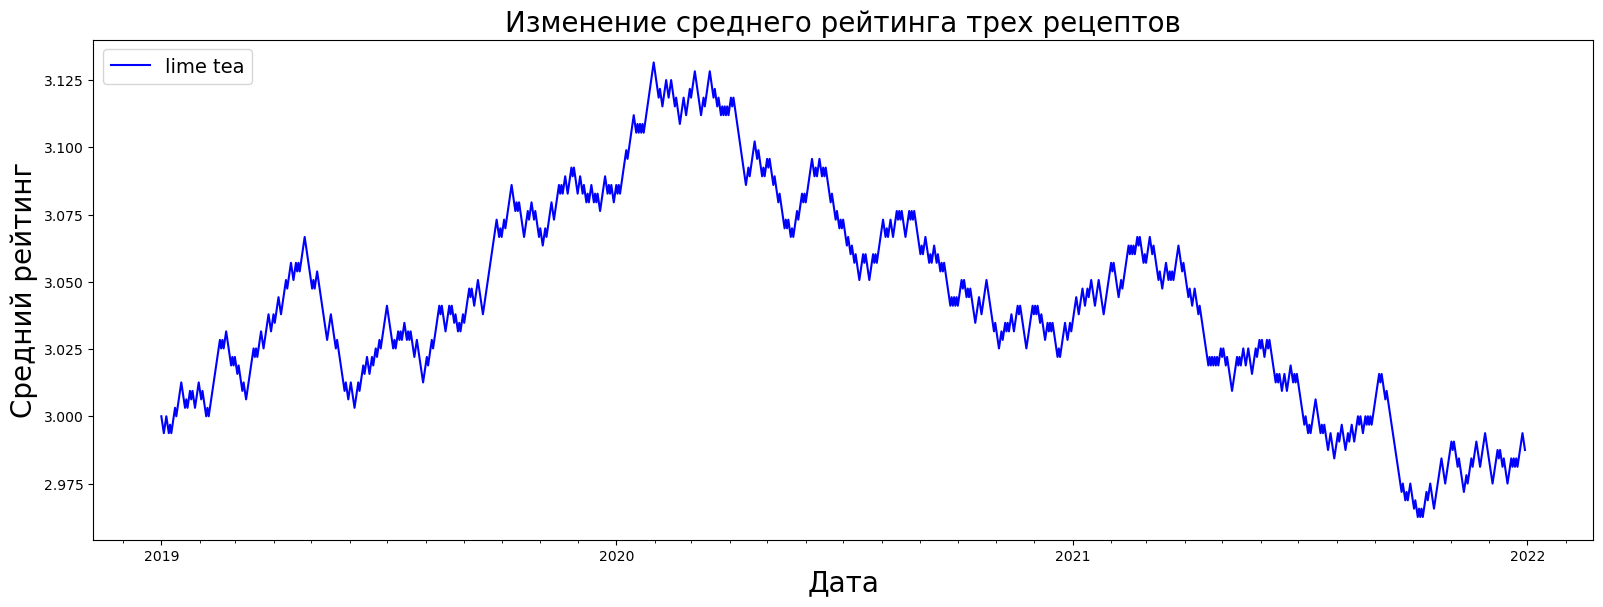

In [93]:
# 1

fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

line1, = ax.plot(dates, data[0], 'r', label = legend[0])

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)

plt.legend(loc=2,fontsize=14)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.tick_params(labelbottom=False)

plt.show()

# 2

fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

line2, = ax.plot(dates, data[1], 'g', label = legend[1])

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)

plt.legend(loc=2,fontsize=14)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
plt.tick_params(labelbottom=False)

plt.show()

# 3
dates = pd.date_range(start='1/1/2019', end='30/12/2021')

fig = plt.figure(figsize = (30, 10))
ax = fig.add_axes([0.1, 0.1, 0.5, 0.5])

line3, = ax.plot(dates, data[2], 'b', label = legend[2])

ax.set_ylabel('Средний рейтинг', fontsize=20)
ax.set_xlabel('Дата', fontsize=20)
ax.set_title("Изменение среднего рейтинга трех рецептов", fontsize=20)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())



plt.legend(loc=2,fontsize=14)


plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


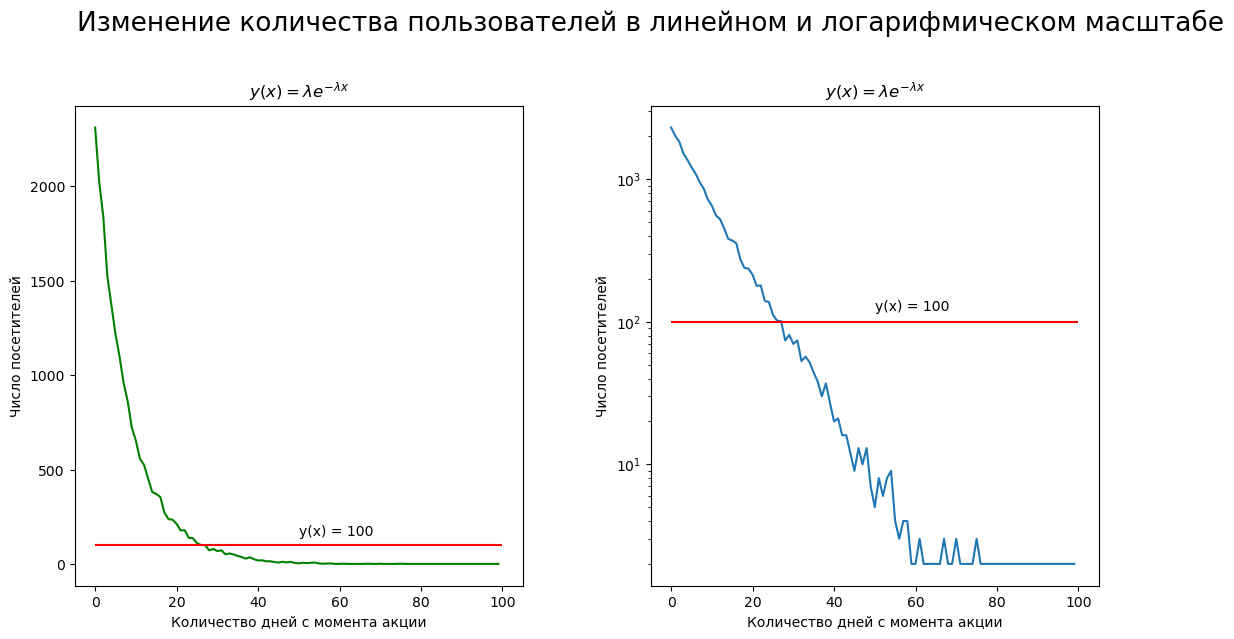

In [97]:
visitors = np.load('data/visitors.npy')

fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.7, 1])

line1, = ax1.plot(np.arange(len(visitors)), visitors, color='g')
ax1.hlines(100, 0, len(visitors), color = 'r')
ax1.text(50, 150, 'y(x) = 100')

ax2 = fig.add_axes([1.0, 0.1, 0.7, 1])
line2, = ax2.plot(np.arange(0, len(visitors)), visitors, label = '$y(x)=\lambda e^{-\lambda x}$')

ax2.set_yscale('log')

ax2.hlines(100, 0, len(visitors), color = 'r')
ax2.text(50, 120, 'y(x) = 100')

ax1.set_title('$y(x)=\lambda e^{-\lambda x}$')
ax2.set_title('$y(x)=\lambda e^{-\lambda x}$')

ax1.set_ylabel('Число посетителей')
ax1.set_xlabel('Количество дней с момента акции')
ax2.set_ylabel('Число посетителей')
ax2.set_xlabel('Количество дней с момента акции')


fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе', x=1, y=1.3, fontsize = 19)

plt.show()

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [31]:
reviews = pd.read_csv('data/reviews_sample.csv', index_col=0)
reviews.rename( columns={'Unnamed: 0':'index'}, inplace=True )
recipes =  pd.read_csv("data/recipes_sample.csv", parse_dates=['submitted'])

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [46]:
def get_recipe_group(row):
    if row['minutes'] < 5:
        return 'Короткие'
    elif row['minutes'] < 50:
        return 'Средние'
    else:
        return 'Длинные'

recipes['группа'] = recipes.apply(get_recipe_group, axis=1)

['Длинные' 'Средние' 'Короткие']


In [10]:
grouped_rec = recipes.groupby('группа').agg({'n_steps': 'mean', 'name': 'count'})
grouped_rec.columns = ['средняя длительность', 'размер группы']
grouped_rec

,средняя длительность,размер группы
группа,,
Длинные,11.917290,11718
Короткие,4.990431,675
Средние,8.581922,17607


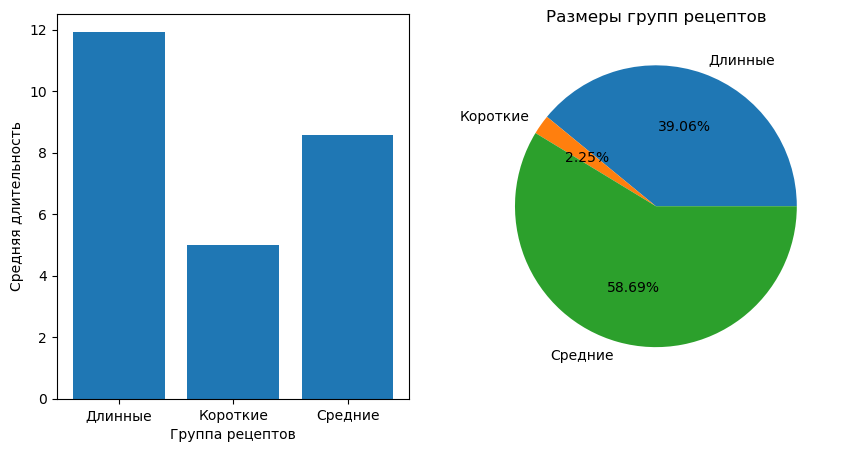

In [40]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1]})

axs[0].bar(grouped_rec.index, grouped_rec['средняя длительность'])

axs[0].set_xlabel('Группа рецептов')
axs[0].set_ylabel('Средняя длительность')

axs[1].pie(grouped_rec['размер группы'], labels=grouped_rec.index, autopct='%1.2f%%')
axs[1].set_title('Размеры групп рецептов')

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

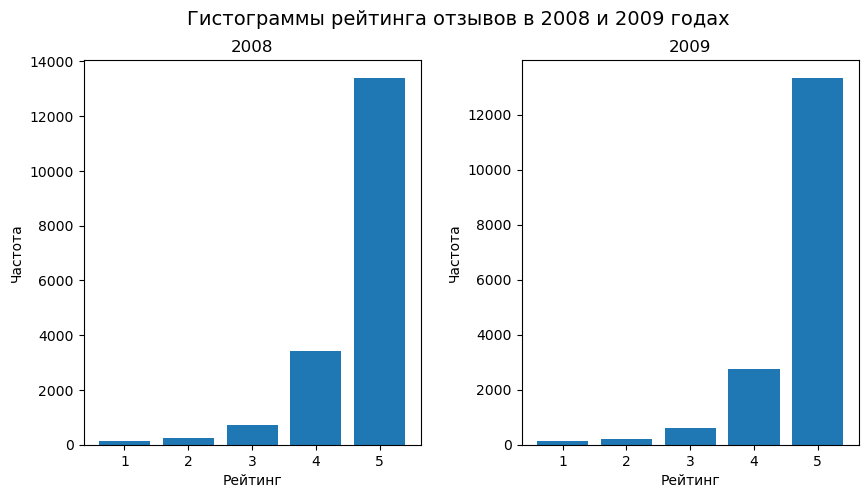

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# фильтрация данных
reviews = reviews.loc[reviews['date'].str.startswith('2008') | reviews['date'].str.startswith('2009')]

fig, ax = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.3})

reviews[reviews['date'].str.startswith('2008')]['rating'].plot.hist(ax=ax[0], bins=range(1,7), align='left', rwidth=0.8)
reviews[reviews['date'].str.startswith('2009')]['rating'].plot.hist(ax=ax[1], bins=range(1,7), align='left', rwidth=0.8)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах', fontsize=14)
ax[0].set_title('2008')
ax[1].set_title('2009')
ax[0].set_xlabel('Рейтинг')
ax[1].set_xlabel('Рейтинг')
ax[0].set_ylabel('Частота')
ax[1].set_ylabel('Частота')

# показать график
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

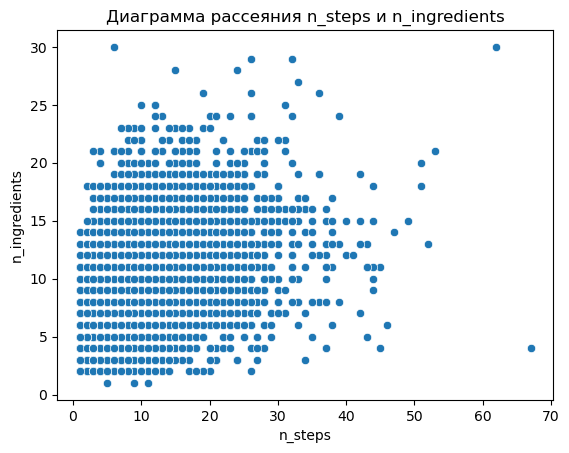

In [44]:
recipes['группа'] = pd.Categorical(recipes['группа'], categories=['короткий', 'средний', 'длинный'])
ax = sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue="группа")
ax.set_title("Диаграмма рассеяния n_steps и n_ingredients")


In [ ]:
На данной диаграмме зависимости нет.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

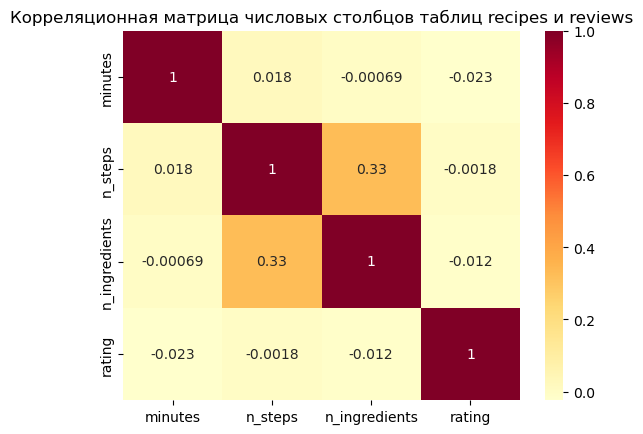

In [47]:
data = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')

# Выбор числовых столбцов
num_cols = ['minutes', 'n_steps', 'n_ingredients', 'rating']
data = data[num_cols]

# Построение корреляционной матрицы
corr_matrix = data.corr()

# Построение тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap="YlOrRd")

# Добавление заголовка
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')

# Отображение графика
plt.show()